In [1]:
import numpy as np

from sklearn import datasets, linear_model, svm
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.utils import check_array

from sklearn.utils._testing import assert_array_almost_equal
from sklearn.utils._testing import assert_array_equal
from sklearn.utils._testing import ignore_warnings
from sklearn.utils._testing import TempMemmap

from sklearn.decomposition import DictionaryLearning
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import SparseCoder
from sklearn.decomposition import dict_learning
from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode

rng_global = np.random.RandomState(0)
n_samples, n_features = 10, 8
X = rng_global.randn(n_samples, n_features)
n_components = 12

def test_dict_learning_reconstruction():
    n_components = 12
    dico = DictionaryLearning(n_components, transform_algorithm='lasso_lars',
                              transform_alpha=0.001, random_state=0)
    code = dico.fit(X).transform(X)
    assert_array_almost_equal(np.dot(code, dico.components_), X, decimal=2)
test_dict_learning_reconstruction()

In [4]:
code, dict_, err = dict_learning(X, n_components = 12, alpha = .0001)
assert_array_almost_equal(np.dot(code, dict_), X, decimal=2)
code, dict_ = dict_learning_online(X, n_components = 12, alpha = .0001)
assert_array_almost_equal(np.dot(code, dict_), X, decimal=2)
print(code.shape)
print(dict_.shape)

(10, 12)
(12, 8)


In [5]:
from sklearn.decomposition import sparse_encode
code_ = sparse_encode(X, dict_, alpha = .00001)
print(code_.shape)

(10, 12)


In [6]:
new_X = np.dot(code_, dict_)
print(new_X.shape)

(10, 8)


In [7]:
assert_array_almost_equal(np.dot(code_, dict_), X, decimal=2)

In [13]:
from sklearn.decomposition._dict_learning_na import sparse_encode_na,\
                                            update1, dict_learning_na,\
                                            update_dict_na


In [133]:
n_samples, n_features = 50, 25
rank = 12
U = rng_global.randn(n_samples, rank)
V = rng_global.randn(rank, n_features)
X = np.dot(U, V)

n_components = 11
code, dict_ = dict_learning_online(X, n_components = n_components,
                                   alpha = .0001)

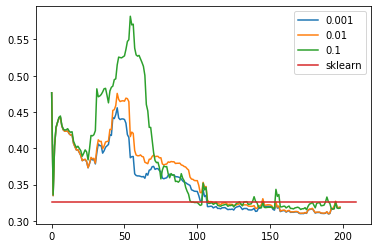

In [137]:
for ro in [.001, .01, .1]:
    code_na, D, loss = dict_learning_na(X, n_components = n_components,
                                        alpha=0.00001, ro = ro)
    plt.plot(loss, label = str(ro))

code, D = dict_learning_online(X, n_components = n_components,
                                        alpha=0.00001)

loss_sklearn = np.mean(np.abs(X - np.dot(code, D)))
plt.plot([loss_sklearn]*210, label = 'sklearn')

plt.legend()


In [138]:
X_na = X.copy()
X_na[0,0] = np.nan
X_na[1,1] = np.nan

code_na, D, loss = dict_learning_na(X_na, n_components = n_components,
                                        alpha=0.00001, ro = ro)

ValueError: array must not contain infs or NaNs

In [102]:
## test

import numpy as np
import time

from sklearn.decomposition._dict_learning_na import sparse_encode_na

from sklearn.utils._testing import assert_array_almost_equal
from sklearn.utils._testing import assert_array_equal


def test_shape_encode():
    
    this_x = X[:5]
    this_code = sparse_encode_na(this_x, dict_, alpha=1)
    assert this_code.shape == (this_x.shape[0], n_components)
    
    this_x = X_na[:5]
    this_code = sparse_encode_na(this_x, dict_, alpha=1)
    assert this_code.shape == (this_x.shape[0], n_components)
        
def test_encode_reconstruction():
    
    code = sparse_encode_na(X, dict_, alpha=.0001)
    assert_array_almost_equal(np.dot(code, dict_), X, decimal=2)
    
    code = sparse_encode_na(X_na, dict_, alpha=.0001)
    X_new = np.dot(code, dict_)
    assert_array_almost_equal(X_new[Mask],
                              X[Mask], decimal=2)
       
def test_dict_learning_na():
    
    code, dict_ = dict_learning_na(X, n_components = 12, alpha = .0001)
    assert_array_almost_equal(np.dot(code, dict_), X, decimal=2)
    print(code.shape)
    print(dict_.shape)
    


    
    
rng_global = np.random.RandomState(0)
n_samples, n_features = 10, 8
n_components = 12
X = rng_global.randn(n_samples, n_features)
code, dict_ = dict_learning_online(X, n_components = 12, alpha = .0001)

X_na = X.copy()
X_na[0,0] = np.nan
X_na[1,1] = np.nan
Mask = np.where(~np.isnan(X_na))

test_shape_encode()
test_encode_reconstruction()
# test_dict_learning_na()

LinAlgError: Matrix is singular.

sparse encode took: 0.020590925216674806 seconds
sparse encode_na took: 0.01768808364868164 seconds
sparse encode took: 0.09416434764862061 seconds
sparse encode_na took: 0.15128302574157715 seconds
sparse encode took: 0.6374880790710449 seconds
sparse encode_na took: 1.1121846199035645 seconds
sparse encode took: 4.665567708015442 seconds
sparse encode_na took: 10.133301401138306 seconds
sparse encode took: 23.54691615104675 seconds
sparse encode_na took: 53.005816388130185 seconds


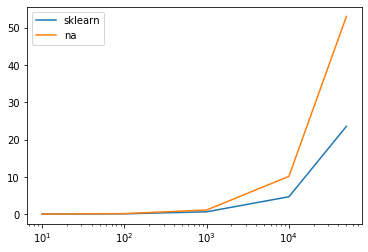

In [24]:
def bench_sparse_encode(n_samples = 100, n_features=50, n_iter = 10):
    
    X = rng_global.randn(n_samples, n_features)
    code, dict_ = dict_learning_online(X, n_components = 12, alpha = 1)

    to = time.time()
    for _ in range(n_iter):
        sparse_encode(X, dict_, alpha=1)
    t1 = time.time()
    print('sparse encode took:\t', (t1 - to)/n_iter, 'seconds')
    t = (t1 - to)/n_iter
    
    to = time.time()
    for _ in range(n_iter):
        sparse_encode_na(X, dict_, alpha=1)
    t1 = time.time()
    print('sparse encode_na took:\t', (t1 - to)/n_iter, 'seconds')
    t_na = (t1 - to)/n_iter
    
    return t, t_na

ln = [10, 100,1000, 10000, 50000]
lt, lt_na = [], []
for n_samples in ln:
    t, t_na = bench_sparse_encode(n_samples = n_samples, n_features=5000, n_iter=2)
    lt.append(t)
    lt_na.append(t_na)
    
plt.plot(ln, lt, label = 'sklearn')
plt.plot(ln, lt_na, label = 'na')
plt.legend()
plt.xscale('log')